# Understanding Market Selection for Land Purchases using Python

In [106]:
# First let's import packages that we will need for the project
import pandas as pd
import numpy as np
import seaborn as sns

In [107]:
# Import dataset into a dataframe

df=pd.read_csv(r'C:\Users\Jayson Naquila\Desktop\Dataset files\Copy of Market Selection - Sheet20.csv')
# Inspecting the data frame columns
df.head()

,State,County,Population,Active,Pending,Sold (30 Days),Sold (90 Days),Sold (180 Days),Sold (365 Days),Days on Market,30 Day Turnover (%),90 Day Turnover (%),180 Day Turnover (%),365 Day Turnover (%),Pending/Active (%),Avg Turnover (%),Redfin URL
0,FL,Polk County,"571,380",121,20,7,45,79,162,204,6,37,65,134,17,60,https://www.redfin.com/county/489/FL/Polk-Coun...
1,AL,Baldwin County,"192,900",145,21,14,44,98,207,180,10,30,68,143,14,63,https://www.redfin.com/county/120/AL/Baldwin-C...
2,AR,Baxter County,"33,882",82,7,14,42,59,120,146,17,51,72,146,9,72,https://www.redfin.com/county/230/AR/Baxter-Co...
3,SC,Greenville County,"501,359",76,17,6,19,41,108,241,8,25,54,142,22,57,https://www.redfin.com/county/2455/SC/Greenvil...
4,AR,Benton County,"225,383",191,1,13,67,118,268,185,7,35,62,140,1,61,https://www.redfin.com/county/231/AR/Benton-Co...


In [108]:
# Finding out null values per column and checking for data types.
for col in df.columns:
    print(df[col].notnull().value_counts(), "\n")


State
True    363
Name: count, dtype: int64 

County
True    363
Name: count, dtype: int64 

Population
True    363
Name: count, dtype: int64 

Active
True    363
Name: count, dtype: int64 

Pending
True    363
Name: count, dtype: int64 

Sold (30 Days)
True    363
Name: count, dtype: int64 

Sold (90 Days)
True    363
Name: count, dtype: int64 

Sold (180 Days)
True    363
Name: count, dtype: int64 

Sold (365 Days)
True    363
Name: count, dtype: int64 

Days on Market
True    363
Name: count, dtype: int64 

30 Day Turnover (%)
True    363
Name: count, dtype: int64 

90 Day Turnover (%)
True    363
Name: count, dtype: int64 

180 Day Turnover (%)
True    363
Name: count, dtype: int64 

365 Day Turnover (%)
True    363
Name: count, dtype: int64 

Pending/Active (%)
True    363
Name: count, dtype: int64 

Avg Turnover (%)
True    363
Name: count, dtype: int64 

Redfin URL
True    363
Name: count, dtype: int64 



In [109]:
# Getting the percentage of null values by column
for col in df.columns:
    null_pct=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,null_pct*100))

State - 0.0%
County - 0.0%
Population - 0.0%
Active - 0.0%
Pending - 0.0%
Sold (30 Days) - 0.0%
Sold (90 Days) - 0.0%
Sold (180 Days) - 0.0%
Sold (365 Days) - 0.0%
Days on Market - 0.0%
30 Day Turnover (%) - 0.0%
90 Day Turnover (%) - 0.0%
180 Day Turnover (%) - 0.0%
365 Day Turnover (%) - 0.0%
Pending/Active (%) - 0.0%
Avg Turnover (%) - 0.0%
Redfin URL - 0.0%


In [110]:
# Let's check data types of each columms
df.dtypes

State                   object
County                  object
Population              object
Active                   int64
Pending                  int64
Sold (30 Days)           int64
Sold (90 Days)           int64
Sold (180 Days)          int64
Sold (365 Days)          int64
Days on Market           int64
30 Day Turnover (%)      int64
90 Day Turnover (%)      int64
180 Day Turnover (%)     int64
365 Day Turnover (%)     int64
Pending/Active (%)       int64
Avg Turnover (%)         int64
Redfin URL              object
dtype: object

In [111]:
# Checking the dataframe properties
shape = df.shape
print(f'The DataFrame has {shape[0]} rows and {shape[1]} columns.')

The DataFrame has 363 rows and 17 columns.


In [112]:
# Importing libraries for visualization
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [113]:
# Finding duplicates in County column to 
duplicate_counts = df['County'].value_counts()[df['County'].value_counts() > 1]
print(duplicate_counts)

County
Madison County       4
Marion County        4
Clay County          4
Cherokee County      4
Polk County          3
Montgomery County    3
Franklin County      3
Union County         3
Jefferson County     3
Lee County           3
Jackson County       3
Randolph County      3
Washington County    3
Marshall County      2
Cleburne County      2
Seminole County      2
Sumter County        2
Pickens County       2
Pike County          2
Escambia County      2
Beaufort County      2
Macon County         2
Logan County         2
Lincoln County       2
Columbia County      2
Calhoun County       2
Orange County        2
Lawrence County      2
Cleveland County     2
Name: count, dtype: int64


Some county have duplicates due to same county name in different states. Let's see if problems will occur later.

# Counties per State in the Dataset

In [114]:
# Group by 'State' and count the number of counties
county_count_per_state = df.groupby('State').size().reset_index(name='CountyCount')
county_count_per_state = county_count_per_state.sort_values(by='CountyCount', ascending=False)
print(county_count_per_state)

  State  CountyCount
4    NC           84
2    FL           59
1    AR           51
0    AL           50
5    OK           49
6    SC           41
3    LA           29


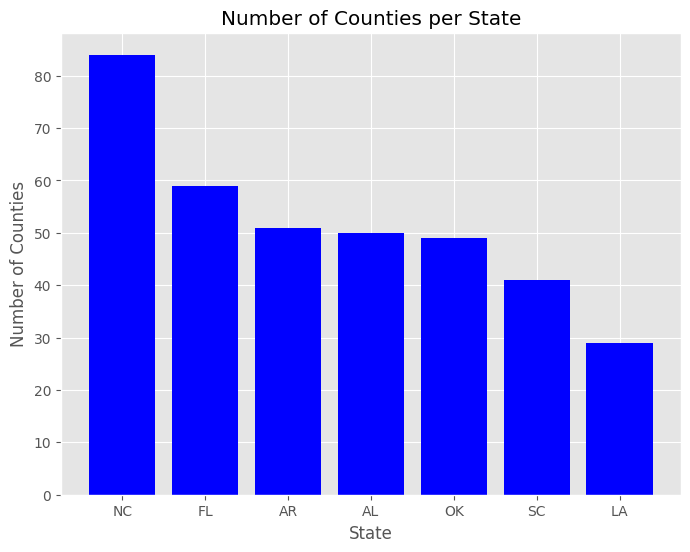

In [115]:
# Plotting
plt.figure(figsize=(8, 6))
plt.bar(county_count_per_state['State'], county_count_per_state['CountyCount'], color='blue')
plt.xlabel('State')
plt.ylabel('Number of Counties')
plt.title('Number of Counties per State')
plt.show()

In [116]:
# County with top 10 population in which can impact demand for land. Larger populations might correlate with higher demand, while smaller populations might suggest more niche markets or lower demand.
county_population = df.groupby('County')['Population'].sum()
county_population = county_population.sort_values(ascending=False)
print(county_population.head(10))

County
Robeson County              99,530
Calhoun County         99,1309,490
Flagler County              97,600
Orange County        96,700417,540
Terrebonne Parish           93,620
Nash County                 91,203
Lancaster County            90,790
Craven County               90,150
Houston County              90,000
Hughes County                9,940
Name: Population, dtype: object


It looks like the County population is not sorted properly. Let's convert the data into integer to correct the sorting problems.

In [117]:
# Remove commas and convert to integer type
df['Population'] = df['Population'].str.replace(',', '').astype(int)

# Group by both 'County' and 'State', then sum the 'Population'
county_state_population = df.groupby(['County', 'State'])['Population'].sum()

# Sort by 'Population' in descending order
county_state_population = county_state_population.sort_values(ascending=False)

# Convert to DataFrame for easier manipulation (optional)
county_state_population_df = county_state_population.reset_index()

# Print the result
print(county_state_population_df)

                County State  Population
0          Polk County    FL      571380
1         Duval County    FL      533460
2    Greenville County    SC      501359
3     Jefferson County    AL      420720
4        Orange County    FL      417540
..                 ...   ...         ...
358  Montgomery County    AR        5350
359  St. Helena Parish    LA        5150
360       Jones County    NC        4860
361   Lafayette County    FL        4600
362        Hyde County    NC        1030

[363 rows x 3 columns]


In [118]:
#Finding the top 20 County with highest population
county_state_population_df=county_state_population_df.head(15)
county_state_population_df

,County,State,Population
0,Polk County,FL,571380
1,Duval County,FL,533460
2,Greenville County,SC,501359
3,Jefferson County,AL,420720
4,Orange County,FL,417540
5,Oklahoma County,OK,404707
6,Hillsborough County,FL,404370
7,Mecklenburg County,NC,393452
8,Volusia County,FL,385630
9,Pasco County,FL,340387


# County Population and impact on land purchases

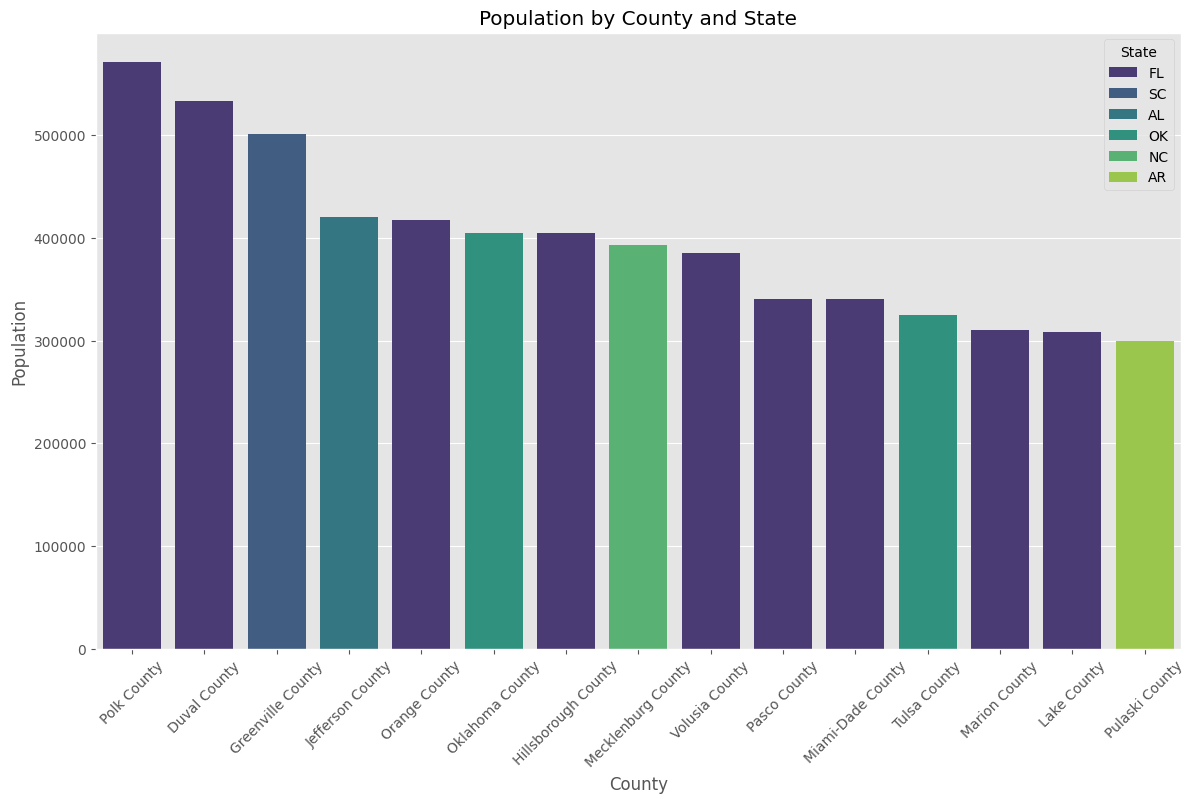

In [119]:
plt.figure(figsize=(14, 8))
sns.barplot(x='County', y='Population', hue='State', data=county_state_population_df, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('County')
plt.xticks(rotation=45)
plt.ylabel('Population')
plt.title('Population by County and State')
plt.show()


Analysis: 
- Larger counties with higher populations, such as Polk County, Duval County, and Greenville County, offer substantial market potential for land purchases. These areas have larger populations which can indicate greater demand for real estate and land. Investing in such regions might be advantageous due to the higher number of potential buyers and the overall economic activity.
- Larger and growing counties present significant opportunities for land purchases due to their higher demand and development potential. Smaller counties might offer less competition but require careful consideration of local market conditions and infrastructure development.

# Correlation of population and active listing

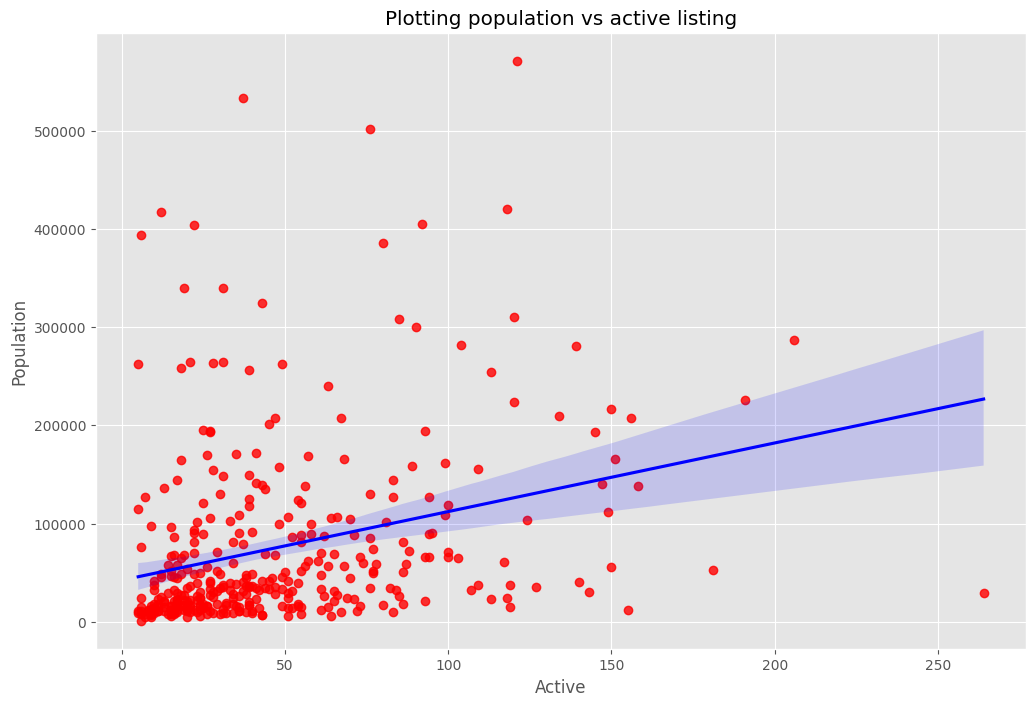

In [120]:
# Correlating population and active listing
sns.regplot(x='Active', y='Population', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

plt.xlabel('Active')
plt.ylabel('Population')
plt.title('Plotting population vs active listing')
plt.show()

In [121]:
# Group by both 'State', then sum the 'Active Listing'
state_summary = df.groupby('State').agg({'Active': 'sum', 'Population': 'sum'})


# Sort by 'Population' in descending order
state_summary = state_summary.sort_values(by='Population', ascending=False)

# Convert to DataFrame for easier manipulation (optional)
state_summary = state_summary.reset_index()

# Print the result
print(state_summary)

  State  Active  Population
0    FL    2896     7533074
1    NC    3770     5825994
2    SC    1780     3908649
3    AL    2471     3446026
4    OK    2113     2454877
5    LA    1553     2165094
6    AR    2684     2097715


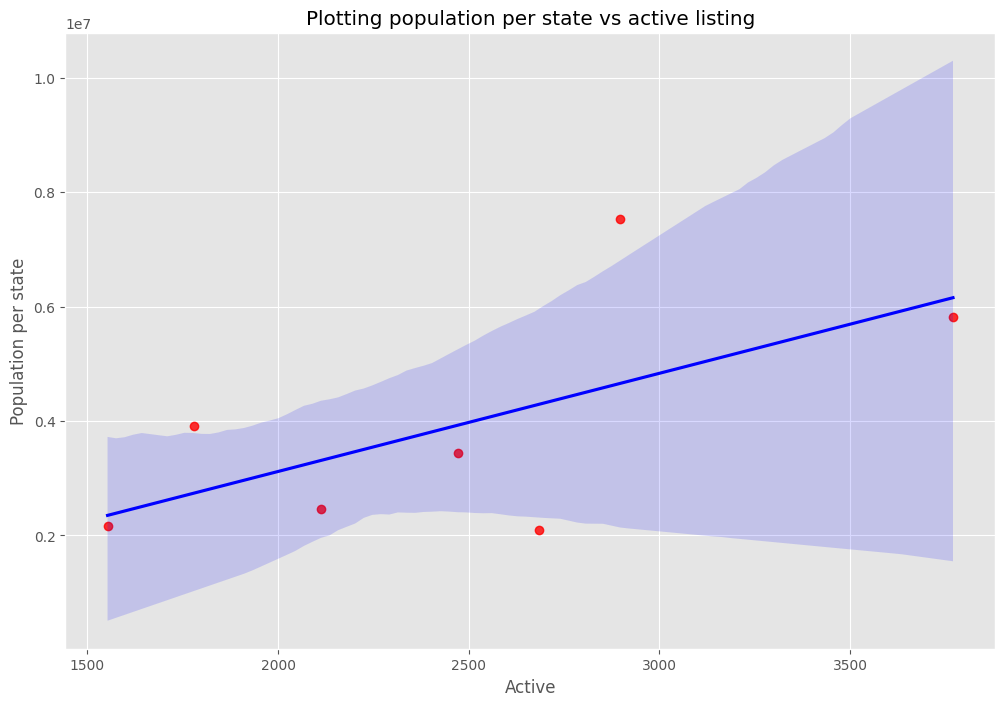

In [122]:
# Let's check the correlation of population and active listing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Plotting population vs active listing
sns.regplot(x='Active', y='Population', data=state_summary, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

plt.xlabel('Active')
plt.ylabel('Population per state')
plt.title('Plotting population per state vs active listing')
plt.show()

Analysis:
There is a slight positive correlation between the number of active listings and the total population of a location. This means that as the population of a location increases, there tends to be a moderate increase in the number of properties actively listed for sale. We can leverage this analysis to identify potential land purchases, as a higher population may indicate a higher demand for new properties. Additionally, this information can be valuable for targeting markets to sell real estate properties, as areas with a growing population may present more opportunities for successful sales and investments.

# Active listing and county population 

In [123]:
# Group by both 'County' and 'State', then sum the 'Active Listing'
county_state_active = df.groupby(['County', 'State','Population'])['Active'].sum()

# Sort by 'Active' in descending order
county_state_active = county_state_active.sort_values(ascending=False)

# Convert to DataFrame for easier manipulation (optional)
county_state_active_df = county_state_active.reset_index()

# Print the result
print(county_state_active_df)

                 County State  Population  Active
0        Jackson County    NC       29294     264
1         Mobile County    AL      286630     206
2         Benton County    AR      225383     191
3        Haywood County    NC       52310     181
4     Santa Rosa County    FL      138400     158
..                  ...   ...         ...     ...
358         Hyde County    NC        1030       6
359      Bamberg County    SC        8860       5
360      Pickens County    AL       10780       5
361  New Hanover County    NC      114860       5
362     Guilford County    NC      262120       5

[363 rows x 4 columns]


In [124]:
# Finding county with highest active land listing and corresponding population
county_state_active_df.head(10)

,County,State,Population,Active
0,Jackson County,NC,29294,264
1,Mobile County,AL,286630,206
2,Benton County,AR,225383,191
3,Haywood County,NC,52310,181
4,Santa Rosa County,FL,138400,158
5,St. Tammany Parish,LA,207190,156
6,Marion County,AR,11827,155
7,Calcasieu Parish,LA,165710,151
8,Rutherford County,NC,55760,150
9,Washington County,AR,216190,150


Analysis: 
- Jackson County stands out with a high number of active listings (264) relative to its population (29,294), which may indicate an oversupply of land or a particularly active real estate market in this region.
- For land buyers or real estate investors, counties like Jackson County and Marion County, which have higher active listing counts relative to their populations, might present unique opportunities for investment or acquisition. Conversely, areas like Mobile County and Benton County could offer a more balanced market with potentially steadier pricing and less volatility.

# Identifying the county with the most active market
We must examine the most active market and determine which county has sold the most property in 30 days.

In [125]:
# Group by both 'County' and 'State', then sum the 'Sold in 30 days'
active_state = df.groupby(['County', 'State'])[['Active', 'Sold (30 Days)']].sum()


# Calculate the percentage of sold listings per active listing
active_state['Sold %'] = (active_state['Sold (30 Days)'] / active_state['Active']) * 100

# Sort by 'Sold %' in descending order
active_state = active_state.sort_values(by='Sold %', ascending=False)


# Print the result
print(active_state)

                           Active  Sold (30 Days)     Sold %
County              State                                   
New Hanover County  NC          5               2  40.000000
Lee County          NC         18               7  38.888889
Hardee County       FL         21               5  23.809524
Franklin County     NC         14               3  21.428571
Conway County       AR         24               5  20.833333
...                           ...             ...        ...
Indian River County FL         22               0   0.000000
Lancaster County    SC         22               0   0.000000
Ouachita Parish     LA         99               0   0.000000
Ouachita County     AR         18               0   0.000000
Pasquotank County   NC         41               0   0.000000

[363 rows x 3 columns]


In [126]:
active_state.head(20)

,,Active,Sold (30 Days),Sold %
County,State,,,
New Hanover County,NC,5,2,40.000000
Lee County,NC,18,7,38.888889
Hardee County,FL,21,5,23.809524
Franklin County,NC,14,3,21.428571
Conway County,AR,24,5,20.833333
Kay County,OK,10,2,20.000000
Georgetown County,SC,15,3,20.000000
Coosa County,AL,15,3,20.000000
Cleveland County,NC,22,4,18.181818


Analysis: 
Counties like New Hanover, Lee, and Hardee have the highest property percentage sold in 30 days. But examining the active listing, they also have a small number which determines a small market and demand. Let us look at another data in which we analyze highest sold in 30 days and calculate percentage sold.

In [127]:
# Group by both 'County' and 'State', then sum the 'Sold in 30 days'
active_state = df.groupby(['County', 'State'])[['Active', 'Sold (30 Days)']].sum()


# Sort by 'Sold (30 Days)' in descending order
active_state = active_state.sort_values(by='Sold (30 Days)', ascending=False)


# Print the result
print(active_state)

                         Active  Sold (30 Days)
County            State                        
Aiken County      SC        147              18
Baxter County     AR         82              14
Baldwin County    AL        145              14
Benton County     AR        191              13
Horry County      SC        113              13
...                         ...             ...
Pike County       AR         30               0
                  AL          6               0
Evangeline Parish LA          6               0
Pickens County    AL          5               0
Hampton County    SC         15               0

[363 rows x 2 columns]


In [128]:
active_state.head(10)

,,Active,Sold (30 Days)
County,State,,
Aiken County,SC,147,18
Baxter County,AR,82,14
Baldwin County,AL,145,14
Benton County,AR,191,13
Horry County,SC,113,13
Anderson County,SC,83,12
Washington County,AR,150,12
Spartanburg County,SC,139,11
Oconee County,SC,94,10


In [129]:
active_state['Sold %'] = (active_state['Sold (30 Days)'] / active_state['Active']) * 100
active_state=active_state.head(10)
active_state.sort_values(by='Sold %', ascending=False)

,,Active,Sold (30 Days),Sold %
County,State,,,
Baxter County,AR,82,14,17.073171
DeKalb County,AL,63,10,15.873016
Anderson County,SC,83,12,14.457831
Aiken County,SC,147,18,12.244898
Horry County,SC,113,13,11.504425
Oconee County,SC,94,10,10.638298
Baldwin County,AL,145,14,9.655172
Washington County,AR,150,12,8.000000
Spartanburg County,SC,139,11,7.913669


Analysis: 
- Baxter County, AR has the highest sold percentage (17.07%), indicating that approximately 17 out of every 100 active listings are selling within 30 days. This high turnover rate suggests a strong demand for land in Baxter County, making it an attractive market for sellers and investors looking for quicker returns.

- Although Baldwin County has a lower sold percentage (9.66%), the high number of active listings (145) suggests that there is market activity, but possibly less demand relative to supply. This county could be an area to watch for potential growth or opportunities if market conditions improve.

- With the lowest sold percentage (6.81%), Benton County appears to have a slower market, with fewer properties selling within 30 days compared to the number of active listings. This could indicate either an oversupply of listings or lower demand, requiring a more strategic approach for sellers.

# Days on Market
Shorter days on market typically indicate high demand, where properties sell quickly. Longer days on market might suggest oversupply or lower demand, which could result in more favorable pricing for buyers.

In [130]:
df

,State,County,Population,Active,Pending,Sold (30 Days),Sold (90 Days),Sold (180 Days),Sold (365 Days),Days on Market,30 Day Turnover (%),90 Day Turnover (%),180 Day Turnover (%),365 Day Turnover (%),Pending/Active (%),Avg Turnover (%),Redfin URL
0,FL,Polk County,571380,121,20,7,45,79,162,204,6,37,65,134,17,60,https://www.redfin.com/county/489/FL/Polk-Coun...
1,AL,Baldwin County,192900,145,21,14,44,98,207,180,10,30,68,143,14,63,https://www.redfin.com/county/120/AL/Baldwin-C...
2,AR,Baxter County,33882,82,7,14,42,59,120,146,17,51,72,146,9,72,https://www.redfin.com/county/230/AR/Baxter-Co...
3,SC,Greenville County,501359,76,17,6,19,41,108,241,8,25,54,142,22,57,https://www.redfin.com/county/2455/SC/Greenvil...
4,AR,Benton County,225383,191,1,13,67,118,268,185,7,35,62,140,1,61,https://www.redfin.com/county/231/AR/Benton-Co...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,NC,Transylvania County,26790,66,12,1,7,18,43,337,2,11,27,65,18,26,https://www.redfin.com/county/2094/NC/Transylv...
359,NC,McDowell County,37462,109,15,1,23,40,111,365,1,21,37,102,14,40,https://www.redfin.com/county/2062/NC/McDowell...
360,NC,Henderson County,104513,70,8,2,5,16,60,373,3,7,23,86,11,30,https://www.redfin.com/county/2051/NC/Henderso...
361,NC,Haywood County,52310,181,20,8,30,55,119,360,4,17,30,66,11,29,https://www.redfin.com/county/2050/NC/Haywood-...


In [131]:
market_days = df.groupby(['County', 'State'])[['Active','Days on Market']].sum()
market_days = market_days.sort_values(by='Days on Market', ascending=True)
market_days

,,Active,Days on Market
County,State,,
Hughes County,OK,23,65
Granville County,NC,23,65
Craig County,OK,6,66
Orange County,NC,15,68
Newberry County,SC,20,69
...,...,...,...
Etowah County,AL,76,422
Ouachita Parish,LA,99,428
Mecklenburg County,NC,6,448


In [132]:
market_days.head(10)


,,Active,Days on Market
County,State,,
Hughes County,OK,23,65
Granville County,NC,23,65
Craig County,OK,6,66
Orange County,NC,15,68
Newberry County,SC,20,69
Washington County,OK,17,72
Independence County,AR,19,80
Warren County,NC,20,80
Vance County,NC,10,80


Analysis: 
- Hughes County, OK, and Granville County, NC have the shortest DOM at 65 days, indicating that properties in these counties are selling more quickly compared to others in the dataset. This suggests a relatively healthy demand, making these counties attractive for sellers who want to move properties faster.
- With the lowest number of active listings (6) and a DOM of 66 days, Craig County might be a niche market with quick turnover, possibly due to limited supply.

# Avg Turnover (%)
This gives a quick snapshot of the overall market activity. A higher average turnover suggests a market where land is frequently changing hands, while a lower average turnover might indicate a slower market.

In [133]:
turnover = df.groupby(['County', 'State'])[['Active','Avg Turnover (%)']].sum()
# Let's sort by number of Active land listing 
turnover = turnover.sort_values(by='Active', ascending=False)
turnover=turnover.head(20)
turnover

,,Active,Avg Turnover (%)
County,State,,
Jackson County,NC,264,31
Mobile County,AL,206,36
Benton County,AR,191,61
Haywood County,NC,181,29
Santa Rosa County,FL,158,33
St. Tammany Parish,LA,156,21
Marion County,AR,155,18
Calcasieu Parish,LA,151,5
Rutherford County,NC,150,30


In [134]:
turnover = turnover.sort_values(by='Avg Turnover (%)', ascending=False)
turnover.head(10)

,,Active,Avg Turnover (%)
County,State,,
Aiken County,SC,147,65
Baldwin County,AL,145,63
Spartanburg County,SC,139,62
Benton County,AR,191,61
Polk County,FL,121,60
Macon County,NC,143,50
Faulkner County,AR,124,48
Washington County,AR,150,48
Suwannee County,FL,127,40


Analysis: 
- Aiken County, SC, and Baldwin County, AL, stand out as the most dynamic markets with the highest average turnover percentages, indicating strong demand and active property movement. These counties are ideal for sellers looking to quickly move their listings.

# Exploring data correlation between numeric data
Identifying relationships between variables are essential to understand more how each data relates to each other. This can be useful for identifying variables that move together.

In [135]:
df.corr(numeric_only=True, method='pearson')

,Population,Active,Pending,Sold (30 Days),Sold (90 Days),Sold (180 Days),Sold (365 Days),Days on Market,30 Day Turnover (%),90 Day Turnover (%),180 Day Turnover (%),365 Day Turnover (%),Pending/Active (%),Avg Turnover (%)
Population,1.000000,0.292037,0.344100,0.273479,0.345972,0.368250,0.428918,0.232588,0.103233,0.109844,0.124261,0.204527,0.196705,0.175770
Active,0.292037,1.000000,0.519330,0.584171,0.691318,0.730616,0.786260,0.255108,-0.079622,-0.212169,-0.240693,-0.249614,-0.171545,-0.250686
Pending,0.344100,0.519330,1.000000,0.424787,0.457300,0.511603,0.541648,0.053462,0.037098,-0.021882,0.003486,0.020362,0.468216,0.010844
Sold (30 Days),0.273479,0.584171,0.424787,1.000000,0.821730,0.786939,0.745571,0.085654,0.533628,0.224774,0.189546,0.124170,-0.029309,0.187819
Sold (90 Days),0.345972,0.691318,0.457300,0.821730,1.000000,0.951844,0.894319,0.092925,0.292027,0.344186,0.284380,0.203110,-0.028784,0.268479
Sold (180 Days),0.368250,0.730616,0.511603,0.786939,0.951844,1.000000,0.953313,0.107232,0.235203,0.246273,0.297749,0.225365,-0.015089,0.266207
Sold (365 Days),0.428918,0.786260,0.541648,0.745571,0.894319,0.953313,1.000000,0.157000,0.157109,0.136602,0.181108,0.214006,-0.019401,0.204585
Days on Market,0.232588,0.255108,0.053462,0.085654,0.092925,0.107232,0.157000,1.000000,-0.014772,-0.116106,-0.113266,-0.078835,-0.091114,-0.097760
30 Day Turnover (%),0.103233,-0.079622,0.037098,0.533628,0.292027,0.235203,0.157109,-0.014772,1.000000,0.569709,0.538499,0.414449,0.102301,0.532400
90 Day Turnover (%),0.109844,-0.212169,-0.021882,0.224774,0.344186,0.246273,0.136602,-0.116106,0.569709,1.000000,0.883683,0.768156,0.281425,0.884437


<Axes: >

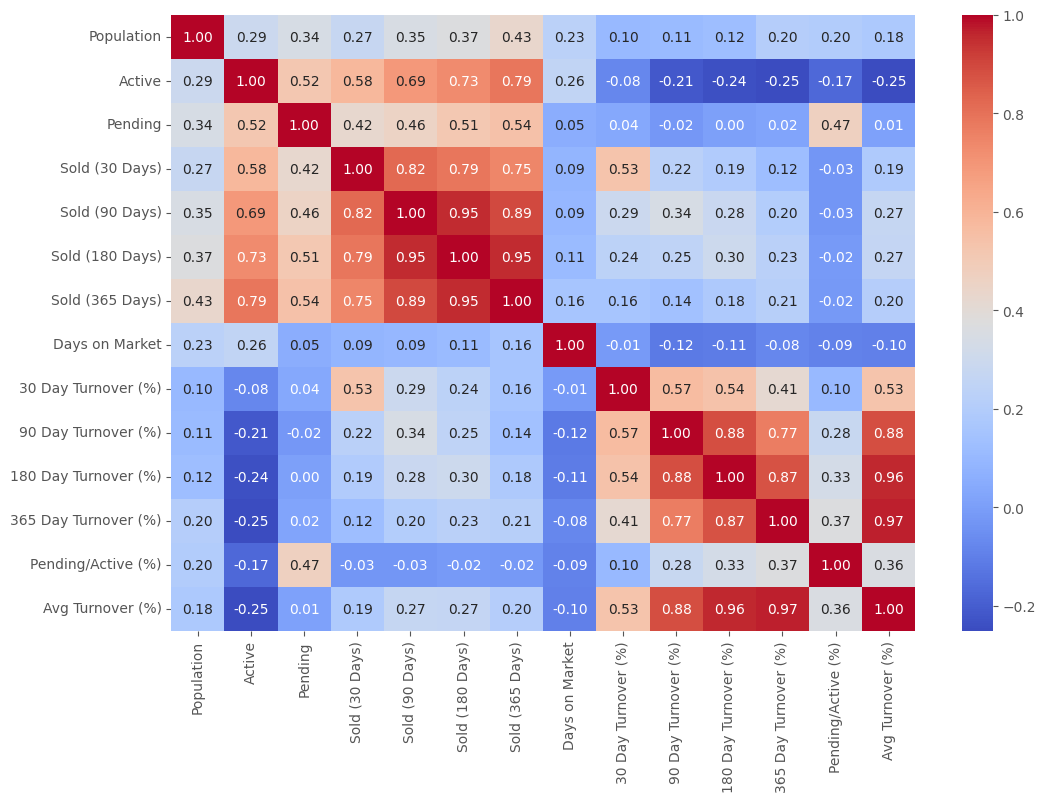

In [136]:
corr_matrix=df.corr(numeric_only=True, method='pearson')
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

Analysis: 
- Most correlations are noticeable on variables Sold (XX Days) and XX Day Turnover (%) due to their correlation variable closer to 1. This is understandable because most turnover happens after the days sold. 
- There are slight correlation on population and active land listing which is plotted above.
- Higher population also increases sales in a year indicated in increase of correlation as XX days sold increases.
- Most sales of active listing are also done in a year due to longer duration in the market.

# Plotting some variables as per correlation matrix

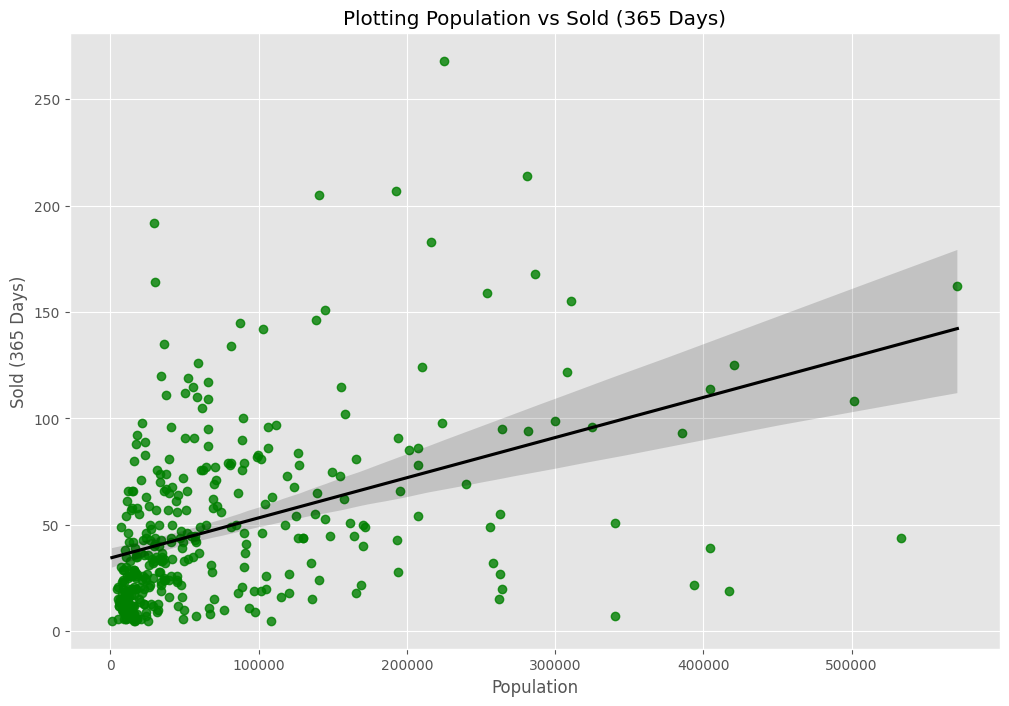

In [137]:
# Plotting population vs Sold (365 Days)
sns.regplot(x='Population', y='Sold (365 Days)', data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'k'})

plt.xlabel('Population')
plt.ylabel('Sold (365 Days)')
plt.title('Plotting Population vs Sold (365 Days)')
plt.show()

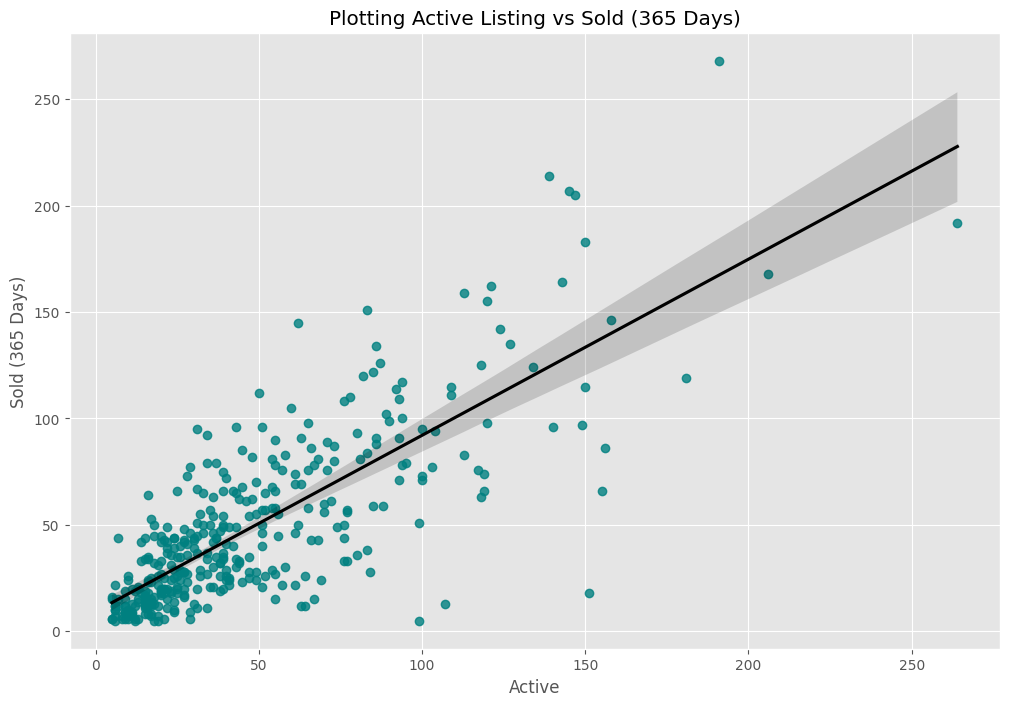

In [138]:
# Plotting population vs Sold (365 Days)
sns.regplot(x='Active', y='Sold (365 Days)', data=df, scatter_kws={'color': 'teal'}, line_kws={'color': 'k'})

plt.xlabel('Active')
plt.ylabel('Sold (365 Days)')
plt.title('Plotting Active Listing vs Sold (365 Days)')
plt.show()